In [104]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [116]:
# Récupération et lecture du fichier xlsx
df_test = pd.ExcelFile('./data/crimes_mensuels.xlsx')
sheet_names = df_test.sheet_names
sheet_names

['France_Entière',
 'France_Métro',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2A',
 '2B',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '971',
 '972',
 '973',
 '974',
 '975',
 '976',
 '977',
 '978',
 '986',
 '987',
 '988']

In [121]:
# récupération des données de chaque département
dict_df = pd.read_excel('./data/crimes_mensuels.xlsx', sheet_name=sheet_names[2:109])

In [122]:
dict_df

{'01':      Index                                      libellé index  _2022_07  \
 0        1             Règlements de compte entre malfaiteurs         0   
 1        2       Homicides pour voler et à l'occasion de vols         0   
 2        3                     Homicides pour d'autres motifs         3   
 3        4  Tentatives d'homicides pour voler et à l'occas...         1   
 4        5          Tentatives homicides pour d'autres motifs         4   
 ..     ...                                                ...       ...   
 102    103  Infractions à l'exercice d'une profession règl...         8   
 103    104  Infractions au droit de l'urbanisme et de la c...         6   
 104    105                                   Fraudes fiscales         0   
 105    106            Autres délits économiques et financiers         0   
 106    107                                      Autres délits       144   
 
      _2022_06  _2022_05  _2022_04  _2022_03  _2022_02  _2022_01  _2021_12  \
 0

In [174]:
# récupération des données de chaque département
dict_sum_df = {}
dict_sum_total_dep = {}
for key, value in dict_df.items():
    dict_sum_df[key] = []
    current_df = dict_df[key].loc[:,"_2021_12": "_2015_01"]
    dict_sum_df[key] =  current_df.sum()[::-1]
    dict_sum_total_dep[key] = dict_sum_df[key].sum()    
# dict_sum_df["01"].sum()

dict_sum_total_dep = {k: v for k, v in sorted(dict_sum_total_dep.items(), key=lambda item: item[1], reverse=True)}
dict_sum_total_dep.values()

dict_values([1930540, 1109240, 1079838, 999478, 952045, 774998, 653619, 644606, 630166, 583015, 568022, 564650, 559103, 524735, 516607, 512554, 500900, 486958, 443827, 434460, 340230, 299426, 298927, 287948, 269652, 263013, 259406, 253285, 241919, 226453, 224395, 219228, 217609, 216689, 215866, 211996, 204153, 202169, 199534, 196301, 195401, 189511, 187616, 184273, 183443, 179536, 176920, 172220, 170784, 166996, 160880, 160581, 148216, 145873, 141416, 137445, 130166, 127770, 126963, 126444, 121827, 119751, 114492, 113801, 108925, 107060, 103858, 101763, 98641, 96089, 95246, 94209, 93636, 90697, 89544, 84248, 83138, 83133, 77263, 75214, 74514, 71761, 68549, 67363, 59603, 59174, 59013, 58198, 57353, 57095, 54267, 53528, 52466, 50796, 48438, 45402, 45105, 44925, 42625, 42238, 29965, 26494, 18523, 16143, 2999, 1068, 912])

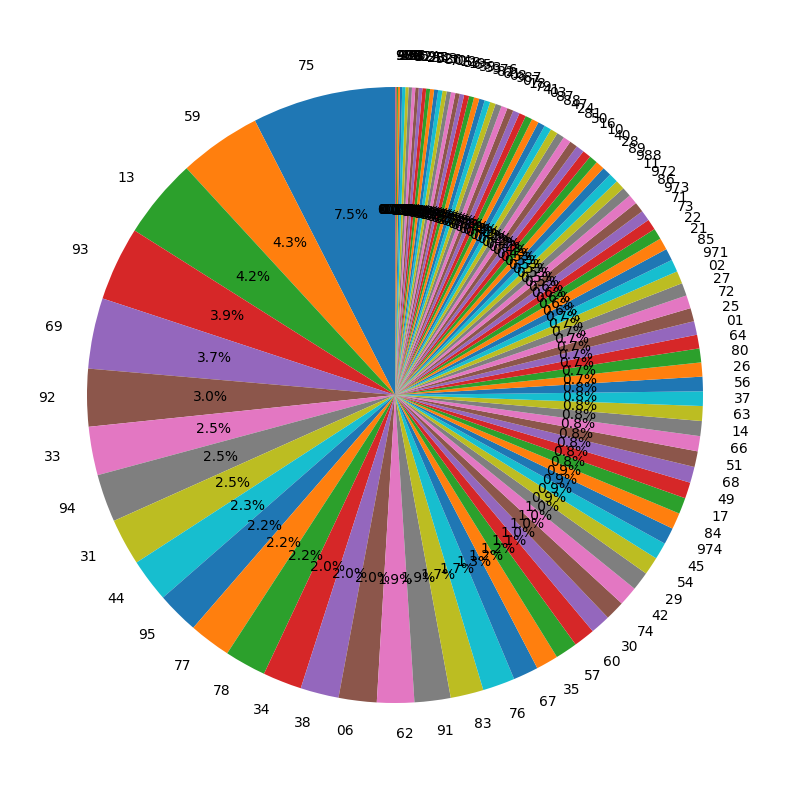

In [175]:
# create data: an array of values

# Create a pieplot
plt.pie(dict_sum_total_dep.values(), labels=dict_sum_total_dep.keys(), autopct='%1.1f%%', startangle=90)
plt.show()